# Fake News Detection

## Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Importing Dataset

In [17]:
df_fake = pd.read_csv("C:\AMIT\PROJ\intern_task2\Fake.csv")
df_true = pd.read_csv("C:\AMIT\PROJ\intern_task2\True.csv")

In [18]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [19]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [20]:
df_fake.drop_duplicates(inplace = True)
df_true.drop_duplicates(inplace = True)

In [21]:
df_fake.dropna(inplace = True)
df_true.dropna(inplace = True)

## Inserting a column "class" as target feature

In [22]:
df_fake["class"] = 0
df_true["class"] = 1

In [23]:
df_fake.shape, df_true.shape

((23478, 5), (21211, 5))

In [24]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23478,23488,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21211,21221,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [25]:
df_fake.shape, df_true.shape

((23478, 5), (21211, 5))

In [26]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\user\AppData\Local\Temp\ipykernel_18620\860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_18620\860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [27]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [28]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [29]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Merging True and Fake Dataframes

In [30]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [31]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [32]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [33]:
df.isnull().sum()

text     0
class    0
dtype: int64

## Random Shuffling the dataframe

In [34]:
df = df.sample(frac = 1)

In [35]:
df.head()

,text,class
20912,Bernie Sanders is so focused on pandering to b...,0
4209,"To hear Donald Trump tell it, he s the best, h...",0
1180,"Donald Trump has chosen to ignore Pride month,...",0
12099,While all of the mainstream media and anonymou...,0
16976,States have rights too! We love the new conser...,0


In [36]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [37]:
df.columns

Index(['text', 'class'], dtype='object')

In [38]:
df.head()

,text,class
0,Bernie Sanders is so focused on pandering to b...,0
1,"To hear Donald Trump tell it, he s the best, h...",0
2,"Donald Trump has chosen to ignore Pride month,...",0
3,While all of the mainstream media and anonymou...,0
4,States have rights too! We love the new conser...,0


## Creating a function to process the texts

In [39]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [40]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [41]:
x = df["text"]
y = df["class"]

In [42]:
df['text'] = df['text'].fillna('')

## Top TF-IDF Features

C:\Users\user\AppData\Local\Temp\ipykernel_18620\489430901.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_df, x='Importance', y='Feature', palette='viridis')


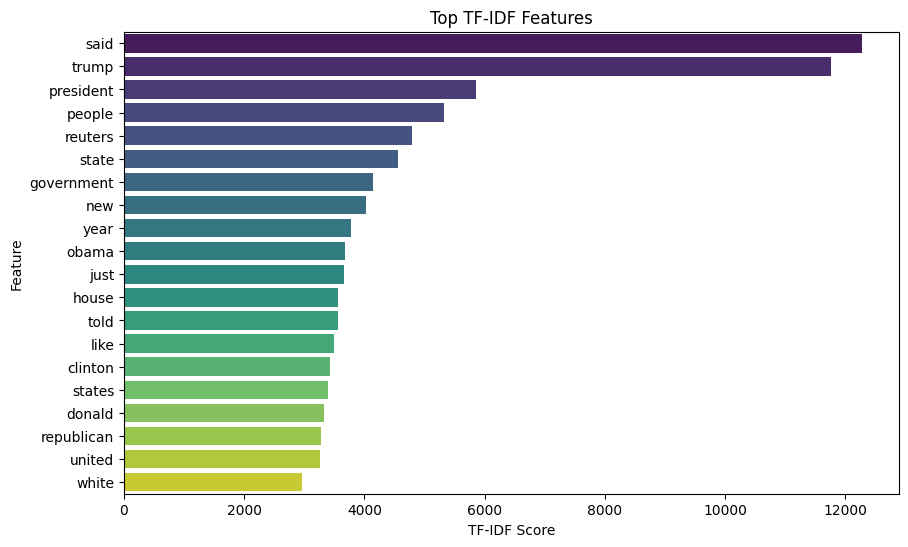

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=20, stop_words='english')
X_tfidf = tfidf.fit_transform(df['text'])
feature_names = tfidf.get_feature_names_out()

# Compute feature importance
feature_importance = X_tfidf.sum(axis=0).A1
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot bar chart of top features
plt.figure(figsize=(10, 6))
sns.barplot(data=features_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top TF-IDF Features')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()

## Preprocessing for Deep Learning

In [68]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post')

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, df['class'], test_size=0.25, random_state=42)


## Train LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"LSTM Model Accuracy: {accuracy:.4f}")


Epoch 1/5


c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1048/1048 ━━━━━━━━━━━━━━━━━━━━ 116s 107ms/step - accuracy: 0.8567 - loss: 0.3320 - val_accuracy: 0.8354 - val_loss: 0.3526
Epoch 2/5
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 113s 108ms/step - accuracy: 0.9142 - loss: 0.2011 - val_accuracy: 0.9848 - val_loss: 0.0471
Epoch 3/5
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 120s 114ms/step - accuracy: 0.9882 - loss: 0.0392 - val_accuracy: 0.9874 - val_loss: 0.0377
Epoch 4/5
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 112s 107ms/step - accuracy: 0.9944 - loss: 0.0224 - val_accuracy: 0.9886 - val_loss: 0.0390
Epoch 5/5
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 114s 109ms/step - accuracy: 0.9961 - loss: 0.0143 - val_accuracy: 0.9884 - val_loss: 0.0408
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9869 - loss: 0.0432
LSTM Model Accuracy: 0.9884


## Splitting Training and Testing

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [47]:
pred_lr=LR.predict(xv_test)

In [48]:
LR.score(xv_test, y_test)

0.9877382976819118

In [49]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5888
           1       0.99      0.99      0.99      5285

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



## Decision Tree Classification

In [50]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [51]:
pred_dt = DT.predict(xv_test)

In [52]:
DT.score(xv_test, y_test)

0.9954354246845073

In [53]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5888
           1       1.00      0.99      1.00      5285

    accuracy                           1.00     11173
   macro avg       1.00      1.00      1.00     11173
weighted avg       1.00      1.00      1.00     11173



## Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [55]:
pred_gbc = GBC.predict(xv_test)

In [56]:
GBC.score(xv_test, y_test)

0.9954354246845073

In [57]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5888
           1       0.99      1.00      1.00      5285

    accuracy                           1.00     11173
   macro avg       1.00      1.00      1.00     11173
weighted avg       1.00      1.00      1.00     11173



## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [59]:
pred_rfc = RFC.predict(xv_test)

In [60]:
RFC.score(xv_test, y_test)

0.9931083862883737

In [61]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5888
           1       0.99      0.99      0.99      5285

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
pred_lstm = model.predict(x_test)
pred_lstm = (pred_lstm > 0.5).astype(int)

# Print LSTM evaluation metrics
print("\nLSTM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, pred_lstm):.4f}")
print(f"Precision: {precision_score(y_test, pred_lstm):.4f}")
print(f"Recall: {recall_score(y_test, pred_lstm):.4f}")
print(f"F1 Score: {f1_score(y_test, pred_lstm):.4f}")


350/350 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step

LSTM Model Evaluation:
Accuracy: 0.9884
Precision: 0.9866
Recall: 0.9888
F1 Score: 0.9877


## Model Testing

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [63]:
news = str(input())
manual_testing(news)



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News


## save models

In [66]:
import joblib

# Save the vectorizer
joblib.dump(vectorization, "vectorizer.pkl")

# Save trained models
joblib.dump(LR, "logistic_regression.pkl")
joblib.dump(DT, "decision_tree.pkl")
joblib.dump(GBC, "gradient_boosting.pkl")
joblib.dump(RFC, "random_forest.pkl")

print("Models and vectorizer saved successfully!")


Models and vectorizer saved successfully!


In [85]:
# Save LSTM tokenizer and model
joblib.dump(tokenizer, "lstm_tokenizer.pkl")
model.save("lstm_model.h5")

print("Model saved successfully!")

Model saved successfully!


In [67]:
# Load vectorizer and models
vectorizer = joblib.load("vectorizer.pkl")
LR = joblib.load("logistic_regression.pkl")
DT = joblib.load("decision_tree.pkl")
GBC = joblib.load("gradient_boosting.pkl")
RFC = joblib.load("random_forest.pkl")

print("Models and vectorizer loaded successfully!")

Models and vectorizer loaded successfully!
